In [1]:
import gudhi as gd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from persim import PersImage
import functools

In [8]:
dataset = "ECG5000"
path       = dataset + "/"
list_filts = ["Alpha-DTM-0", "Alpha-DTM-1"]

X1 = np.array(pd.read_csv(path + dataset + "_TRAIN.tsv", sep="\t", header=None))[:30]
X2 = np.array(pd.read_csv(path + dataset + "_TEST.tsv",  sep="\t", header=None))[:30]
X = np.vstack([X1, X2])
split = len(X1)

usetex mode requires TeX.


Rips complex is of dimension 3 - 523685 simplices - 60 vertices.


<Figure size 640x480 with 0 Axes>

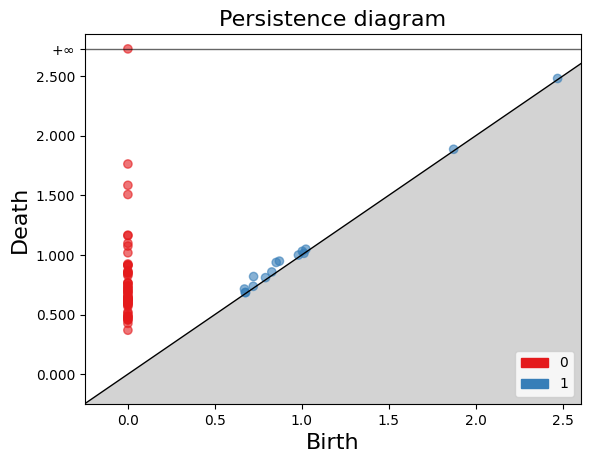

In [3]:
# Scale the DataFrame by the maximum value
max_value = X.max()
scaled_array = X / max_value

# compute the pariwise distance matrix
distance_matrix = np.linalg.norm(scaled_array[:, None] - scaled_array, axis=-1)

# Fill in the similarity diagonal # not sure whether it should be 1s or 0s
np.fill_diagonal(distance_matrix, 0)

# create the Rips complex and print inf
rips_complex = gd.RipsComplex(distance_matrix = distance_matrix)
simplex_tree = rips_complex.create_simplex_tree(max_dimension = 3)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'

persistence_results = simplex_tree.persistence()
plt.figure()
gd.plot_persistence_diagram(persistence_results)
plt.show()

In [7]:
# Convert the persistence diagrams to persistence images
pim = PersImage()

print(persistence_results)

persistence_images = pim.transform(persistence_results)


# Plot the persistence image
plt.imshow(persistence_images, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Persistence Image')
plt.show()

PersImage(pixels=(20, 20), spread=None, specs=None, kernel_type="gaussian", weighting_type="linear")
[(1, (0.7223594186362015, 0.8184613114374185)), (1, (0.8524980241246519, 0.9366132313356127)), (1, (0.8707824018719724, 0.947653239188637)), (1, (0.66996857687532, 0.713708015173296)), (1, (0.827092670954548, 0.856765935950166)), (1, (1.002482349680073, 1.030131146381844)), (1, (1.0231242674522247, 1.0476200840463548)), (1, (0.7909422251244247, 0.8092129130191613)), (1, (0.9800501078084664, 0.9982425165948402)), (1, (0.7205233370364845, 0.7363215154486601)), (1, (1.8722796608015766, 1.885439874083379)), (1, (0.6741407377472609, 0.684299893358848)), (1, (2.4698866827607913, 2.479050662374243)), (1, (0.6768005412011443, 0.684299893358848)), (1, (1.0117811145669815, 1.0132355102940436)), (0, (0.0, inf)), (0, (0.0, 1.7621189948766973)), (0, (0.0, 1.5834572345252689)), (0, (0.0, 1.506213409916294)), (0, (0.0, 1.1654804075813745)), (0, (0.0, 1.1613232498300203)), (0, (0.0, 1.0975860724175623)

/var/folders/rs/5jvwzr1d1klbwx2x36gq7bf00000gn/T/ipykernel_23302/522240075.py:2: DeprecationWarning: Call to deprecated class PersImage. (Replaced with the class `persim.PersistenceImager`.) -- Deprecated since version 0.1.5.
  pim = PersImage()


TypeError: unsupported operand type(s) for -: 'tuple' and 'int'